<p style="font-family: Arial; font-size:3.75em;color:#2462C0; font-style:bold"><br>
Pandas Tutorial</p><br>

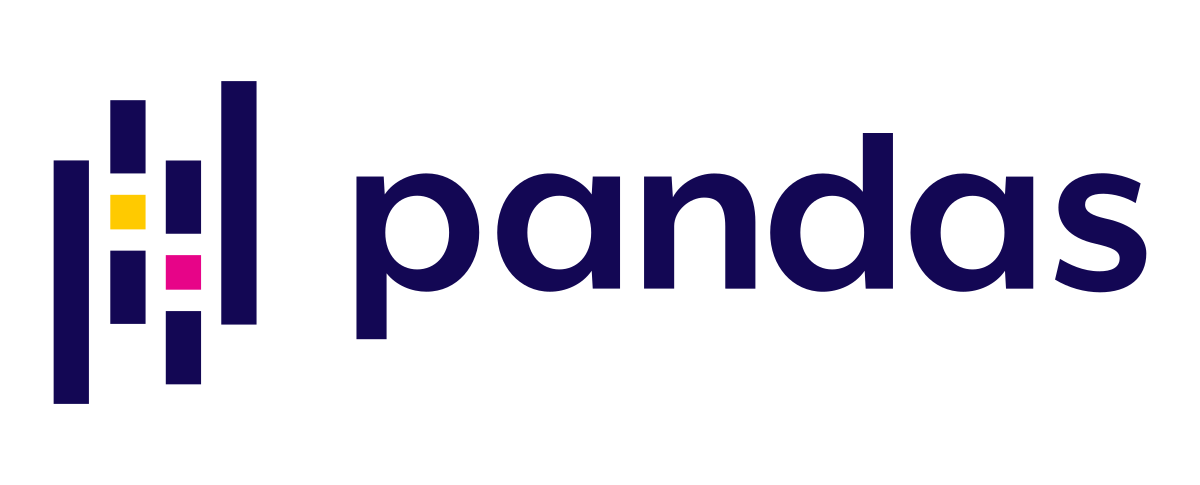
*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Basic plotting with Pandas

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

Import pandas

In [68]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>

Core components of pandas: Series and DataFrames
The primary two components of pandas are the Series and DataFrame.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

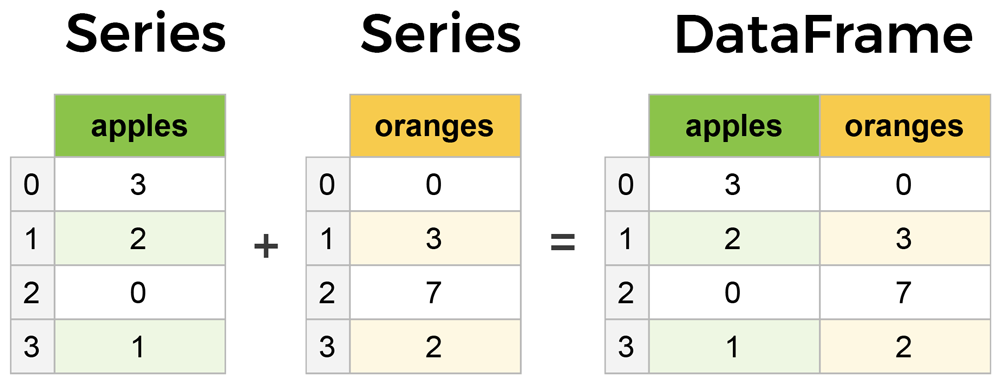
Image source: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

In [69]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2],
    'bananas': [10, 2, 9, 4]
}
data

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2], 'bananas': [10, 2, 9, 4]}

This takes what was stored in data and converts it to a pandas DataFrame called purchases. We now have all of the functionality of the DataFrame (and it looks nicer too!).

In [70]:
purchases = pd.DataFrame(data)
purchases

,apples,oranges,bananas
0,3,0,10
1,2,3,2
2,0,7,9
3,1,2,4


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

Assign names to the rows instead of just numbered indices.

In [71]:
purchases = pd.DataFrame(data, index=['Jackie', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges,bananas
Jackie,3,0,10
Robert,2,3,2
Lily,0,7,9
David,1,2,4


Show me the data associated with Jackie.

In [72]:
purchases.loc['Jackie']

apples      3
oranges     0
bananas    10
Name: Jackie, dtype: int64

Instead of the name, you can reference a row by its index. This is grabbing the data associated with row 0, which is Jackie's row.

In [73]:
purchases.iloc[0]

apples      3
oranges     0
bananas    10
Name: Jackie, dtype: int64

Show me the data for each person in column 'apples'.

In [74]:
purchases['apples']

Jackie    3
Robert    2
Lily      0
David     1
Name: apples, dtype: int64

There is another notation that we can use for the previous command. There is no difference between the two and is a matter of preference:

In [75]:
purchases.apples

Jackie    3
Robert    2
Lily      0
David     1
Name: apples, dtype: int64

Create a new column called total that is the sum of the three existing columns.

In [76]:
purchases['total'] = purchases['apples'] + purchases['oranges'] + purchases['bananas'] 
purchases

,apples,oranges,bananas,total
Jackie,3,0,10,13
Robert,2,3,2,7
Lily,0,7,9,16
David,1,2,4,7


## Checkpoint: Create a new column called value which is calculated as apples + 0.5 * oranges + 0.25 * bananas.

In [77]:
purchases['value'] = purchases.apples + 0.5*purchases.oranges + 0.25*purchases.bananas
purchases

,apples,oranges,bananas,total,value
Jackie,3,0,10,13,5.50
Robert,2,3,2,7,4.00
Lily,0,7,9,16,5.75
David,1,2,4,7,3.00


Create a new column called 'lots of fruit' that indicates whether the value in the 'total' column for that row is greater than 10.

In [78]:
purchases['lots_of_fruit'] = purchases['total'] > 10
purchases

,apples,oranges,bananas,total,value,lots_of_fruit
Jackie,3,0,10,13,5.50,True
Robert,2,3,2,7,4.00,False
Lily,0,7,9,16,5.75,True
David,1,2,4,7,3.00,False


Delete a column.

In [79]:
del purchases['lots_of_fruit']

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [80]:
movies = pd.read_csv('./data/movies.csv', sep=',')

Head shows the first five rows of the DataFrame by default, unless you give the function an input parameter. Here we ask for the first 15 rows. This is just to get a look at the data.

In [81]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## Checkpoint: Use the head command to print out the first 10 rows of the movies DataFrame.

In [82]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


There's an equivalent function called tail that looks at the end of the file.

In [83]:
movies.tail(15)

,movieId,title,genres
9727,190213,John From (2015),Drama
9728,190215,Liquid Truth (2017),Drama
9729,190219,Bunny (1998),Animation
9730,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary


In [84]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
tags = pd.read_csv('./data/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [85]:
ratings = pd.read_csv('./data/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [86]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

In [87]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! Show statistics for the rating column.

In [88]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Show statistics for all columns in the ratings file.

In [89]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


Find mean of only the rating column.

In [90]:
ratings['rating'].mean()

3.501556983616962

Find mean of all columns.

In [91]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

Find min of only the rating column.

In [92]:
ratings['rating'].min()

0.5

Find max of only the rating column.

In [93]:
ratings['rating'].max()

5.0

Find standard deviation of only the rating column.

In [94]:
ratings['rating'].std()

1.0425292390605359

Find the most common rating in the rating column.

In [95]:
ratings['rating'].mode()

0    4.0
dtype: float64

How many times did each rating appear?

In [96]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

## Checkpoint: How many times did each movieId appear in the ratings DataFrame?

In [97]:
ratings['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
260       251
480       238
110       237
589       224
527       220
2959      218
1         215
1196      211
2858      204
50        204
47        203
780       202
150       201
1198      200
4993      198
1210      196
858       192
457       190
592       189
5952      188
2028      188
7153      185
588       183
608       181
2762      179
         ... 
4451        1
31086       1
62718       1
188797      1
31150       1
33201       1
94735       1
80454       1
94799       1
2656        1
26732       1
8293        1
65601       1
6178        1
7459        1
179511      1
5602        1
128542      1
44597       1
7843        1
42740       1
1824        1
5922        1
153386      1
57147       1
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

How many missing values are in the rating column?

In [98]:
ratings['rating'].isna().sum()

0

## Checkpoint: How many missing values are in each column of the movies DataFrame? Hint: There is a single command to get all of this information.

In [99]:
ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

What is the correlation between each of the numerical columns? Note that values on the main diagonal should be ignored (the 1.000000 values) since it's measuring the correlation of a variable with itself.

In [100]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


Remove any rows unless their rating is greater than 4. Save this to a new DataFrame called filter.

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

Create a filter containing only the rows in the ratings file that contained ratings of at least 4.0. Put the results of this filter in a new DataFrame called is_highly_rated.

In [101]:
is_highly_rated = ratings[ratings['rating'] >= 4.0]
is_highly_rated.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0
10,1,163,5.0


## Checkpoint: Create a filter on the movies DataFrame to find only the movies with movieIds of less than 1000.

In [102]:
movies[movies['movieId'] < 1000]


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Create a new DataFrame called is_animation consisting only of rows in the movies file that contain "Animation" in the genre column. Note that we use contains instead of == because there are often multiple genres for each movies in the file, as you can see below.

In [103]:
is_animation = movies[movies['title'].str.contains('Among Us')]
is_animation.head(10)

,movieId,title,genres
3728,5165,Zombie (a.k.a. Zombie 2: The Dead Are Among Us...,Horror


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

What is the average rating for each movie (movieId)?

In [104]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head(10)

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
6,3.946078
7,3.185185
8,2.875000
9,3.125000


How many ratings are there for each movie (movieId)?

In [105]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head(10)

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
6,102
7,54
8,8
9,16


What is the average rating given to movies by each user?

In [106]:
user_average_rating = ratings[['userId','rating']].groupby('userId').mean()
user_average_rating.sort_values(by='rating', ascending=False).head(10)

,rating
userId,
53,5.000000
251,4.869565
515,4.846154
25,4.807692
30,4.735294
523,4.693333
348,4.672727
171,4.634146
452,4.556931


## Checkpoint: Find the 20 toughest raters (i.e. have the lower average rating given for movies).

In [107]:
user_average_rating = ratings[['userId','rating']].groupby('userId').mean()
user_average_rating.sort_values(by='rating', ascending=True).head(20)

,rating
userId,
442,1.275000
139,2.144330
508,2.145833
153,2.217877
567,2.245455
311,2.339286
298,2.363685
517,2.386250
308,2.426087


What is the average rating given to movies by each user, and also how many movies did each user rate?

In [108]:
user_average_rating_and_count = ratings[['userId','rating']].groupby('userId').agg(['mean', 'count'])
user_average_rating_and_count.head(10)

rating      
            mean count
userId                
1       4.366379   232
2       3.948276    29
3       2.435897    39
4       3.555556   216
5       3.636364    44
6       3.493631   314
7       3.230263   152
8       3.574468    47
9       3.260870    46
10      3.278571   140

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [109]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Extract year from title e.g. (1995). Don't worry about the syntax here. This is using something called regular expressions. The idea is that we can make some transformation to a column and save it as a new column.

In [110]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [111]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

In [112]:
import numpy as np
import pandas as pd
%matplotlib inline

In [113]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Make a histogram of the ratings found in the ratings DataFrame. Make the output 15 inches x 10 inches. Jupyter will scale it but you could save the histogram to a file and that would be the size of the image.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A4A6CDAC8>]],
      dtype=object)

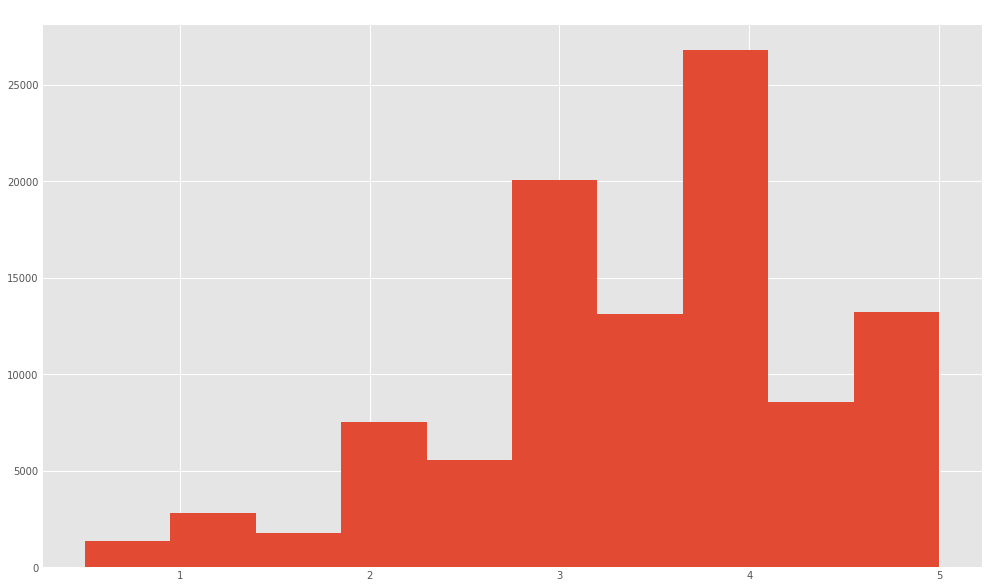

In [114]:
ratings.hist(column='rating', figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A4A6CDA90>]],
      dtype=object)

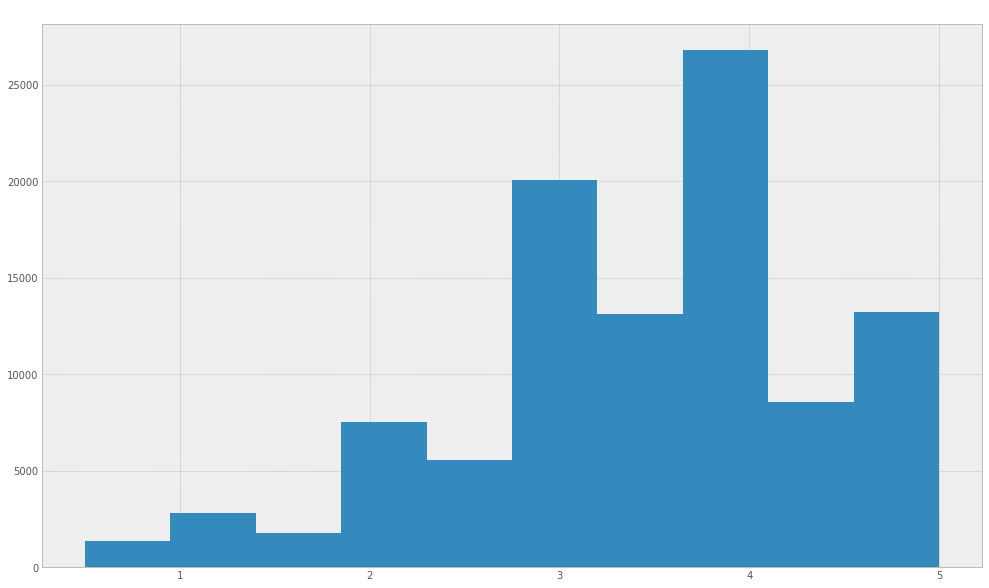

In [115]:
plt.style.use('bmh')
ratings.hist(column='rating', figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A4A642DA0>]],
      dtype=object)

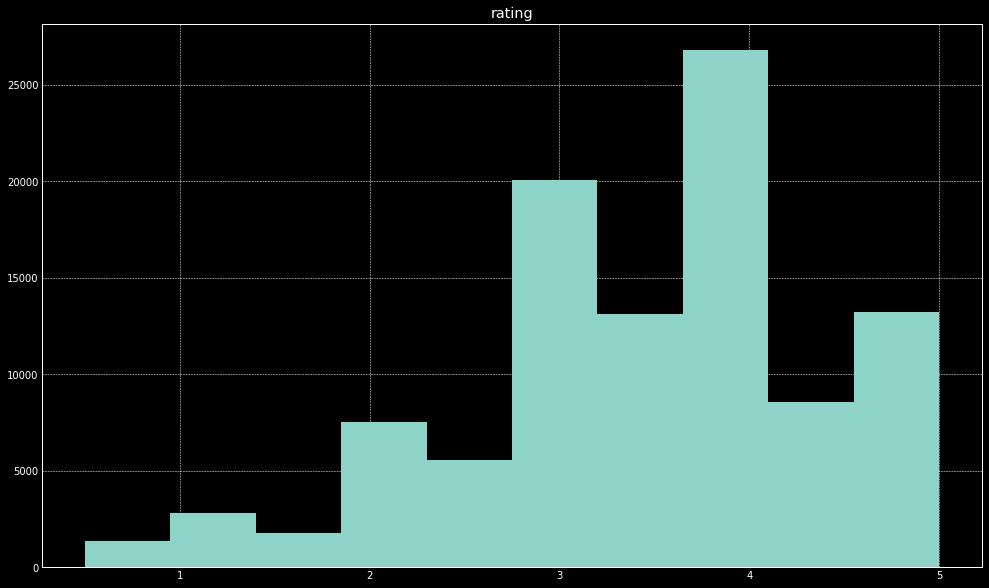

In [116]:
plt.style.use('dark_background')
ratings.hist(column='rating', figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A4A648B70>]],
      dtype=object)

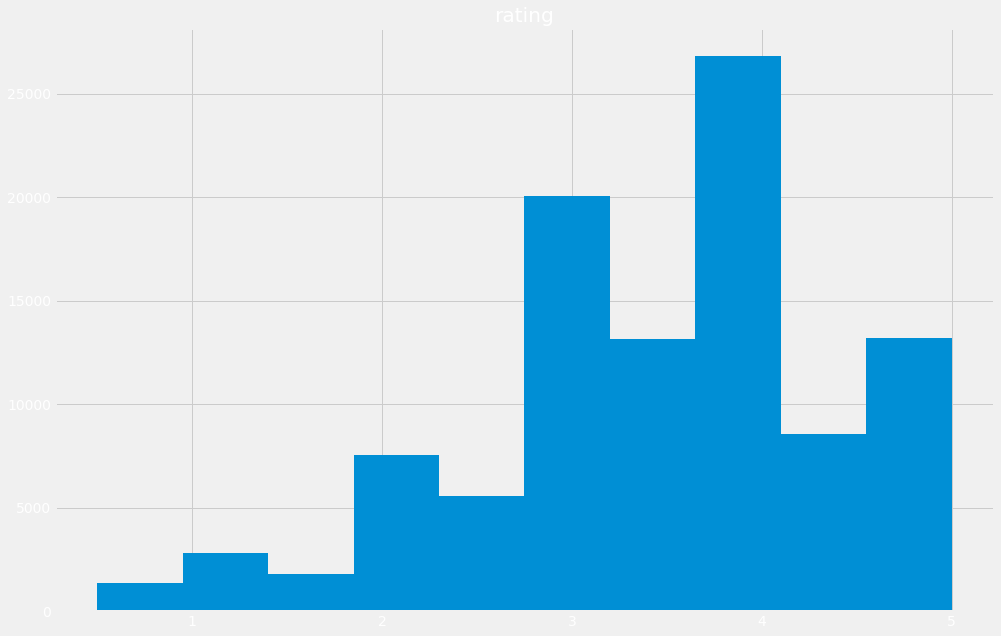

In [117]:
plt.style.use('fivethirtyeight')
ratings.hist(column='rating', figsize=(15,10))

In [118]:
plt.style.use('ggplot')

Let's stick with the ggplot style.

In [119]:
import numpy as np
import pandas as pd
%matplotlib inline

Plot the ten most common tags as a bar graph.

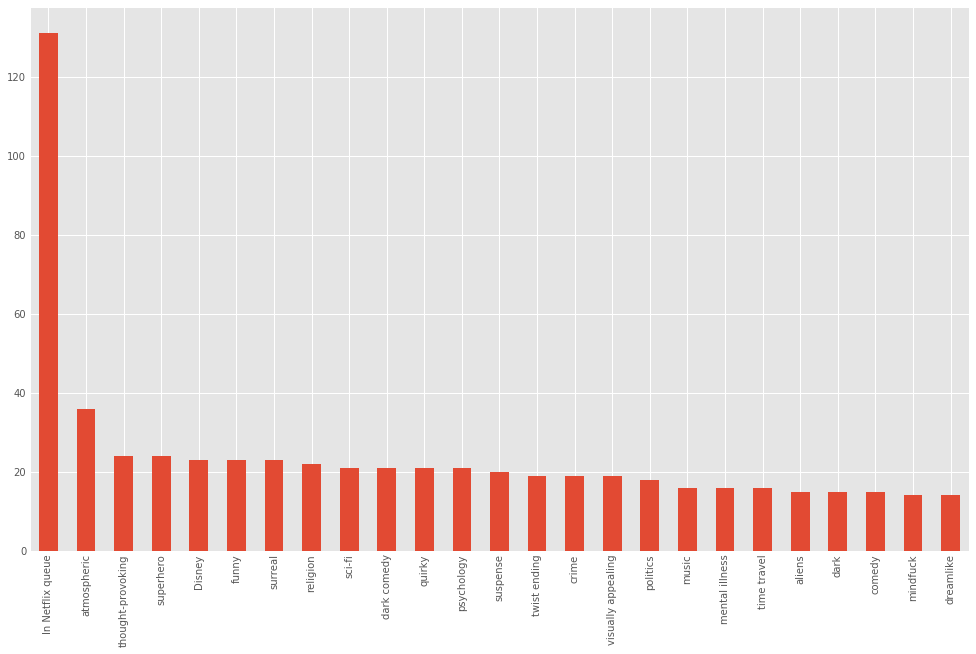

In [120]:
tags['tag'].value_counts()[:25].plot(kind='bar', figsize=(15,10))

## Checkpoint: Plot the 15 most common genres from the movies DataFrame as a bar graph.

<h1 style="font-size:1.5em;color:#2467C0">Average Movie Ratings over Time </h1>

Display the movieId and ratings columns. Group the data by movieId (we could also group by any other column that exists in the DataFrame and display the mean rating for each movieId.

In [121]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5
9723,193609,4.0


Merge together the newly created column with the movies DataFrame, then check out the correlation between movieId and rating. It's very low as we would expect. movieId is just a sequential number and should have little relation to the movie rating.

In [122]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.corr()

,movieId,rating
movieId,1.000000,0.027841
rating,0.027841,1.000000


Now let's group the results by year and find the mean of movies made in each year.

In [123]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
5,1917,4.500000
6,1919,2.000000
7,1920,3.678571
8,1921,4.100000
9,1922,3.531250


Plot the data in the table immediately above.

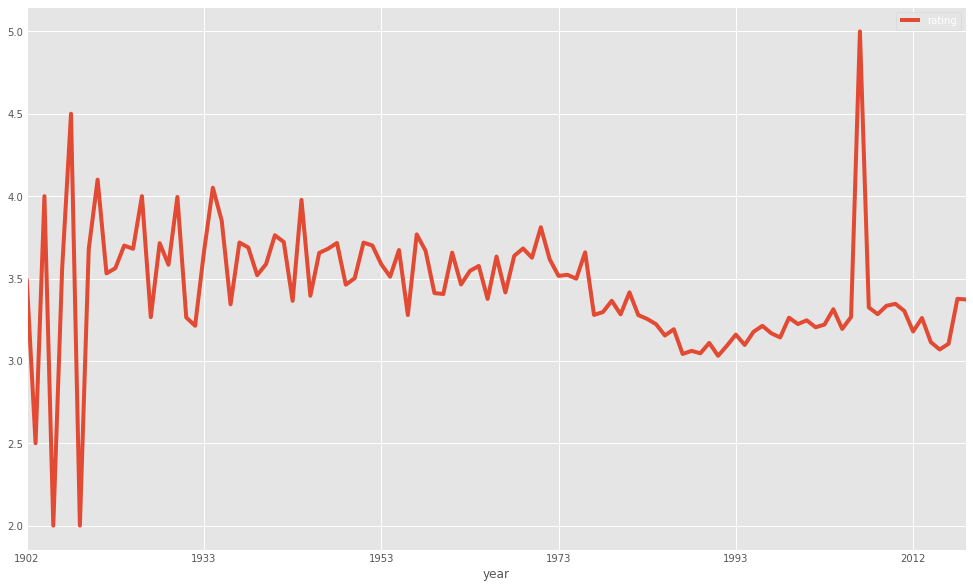

In [124]:
yearly_average.plot(x='year', y='rating', figsize=(15,10), grid=True)

## Checkpoint: Do some years look better for the boxoffice movies than others? <br>Does any data point seem like an outlier in some sense?

</p>

<h1 style="font-size:2em;color:#2467C0"> More Plot Types </h1>

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)
___

## Read in Some Fictitious Data

We have some fake data stored in df1.csv and df2.csv which will be used for the examples that follow.

In [125]:
df1 = pd.read_csv('./data/df1.csv',index_col=0)
df2 = pd.read_csv('./data/df2.csv')

Let's start going through them!

## Area

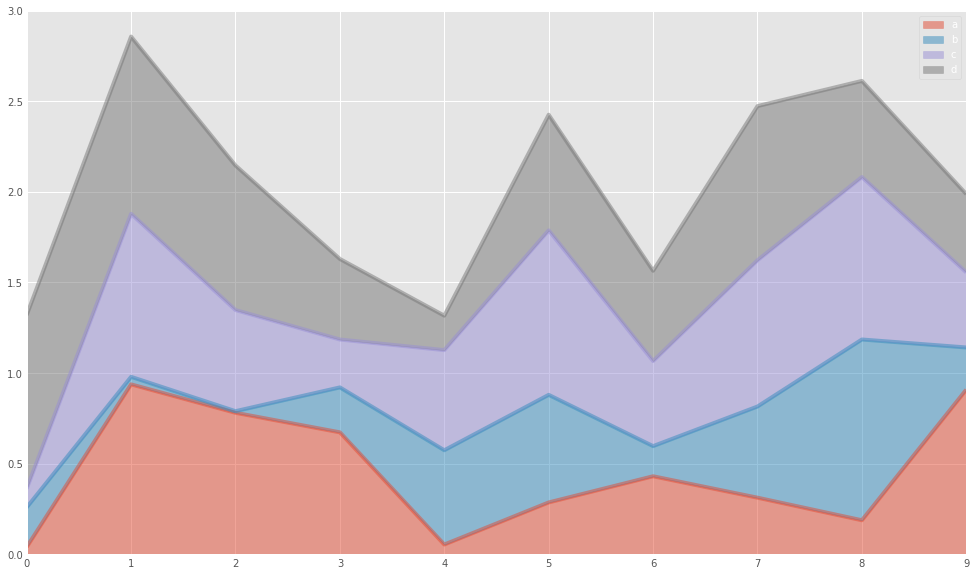

In [126]:
df2.plot.area(alpha=0.5,figsize=(15,10))

## Barplots

In [127]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


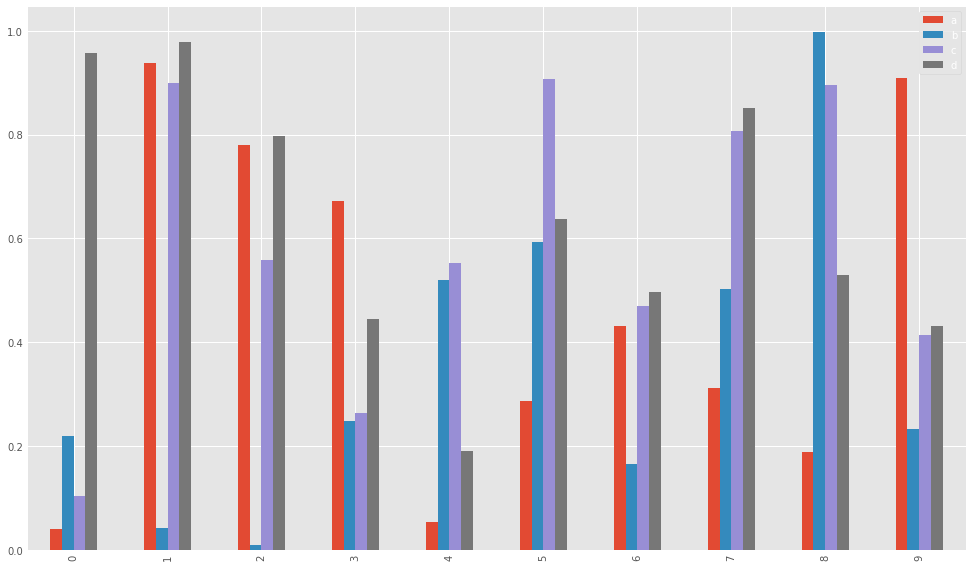

In [128]:
df2.plot.bar(figsize=(15,10))

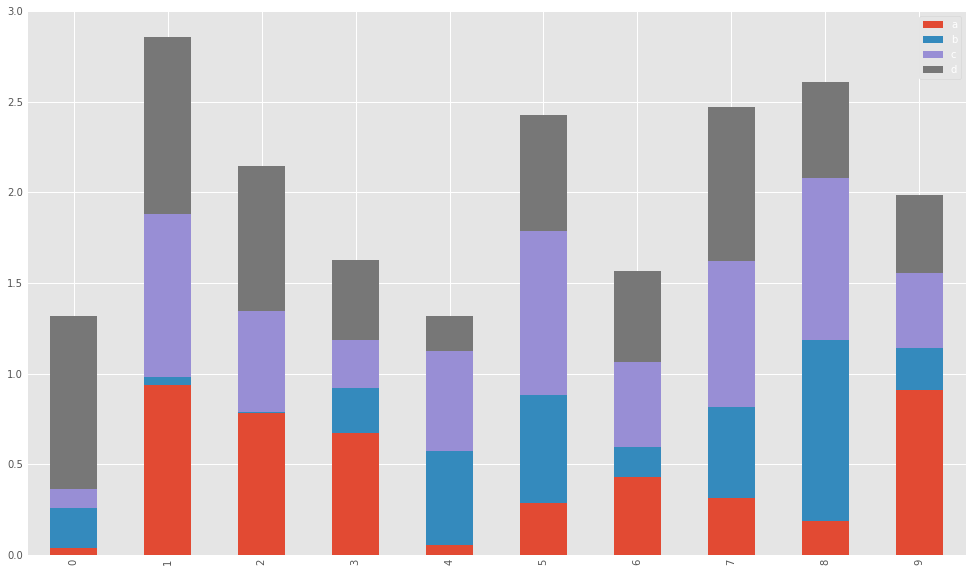

In [129]:
df2.plot.bar(stacked=True,figsize=(15,10))

## Histograms

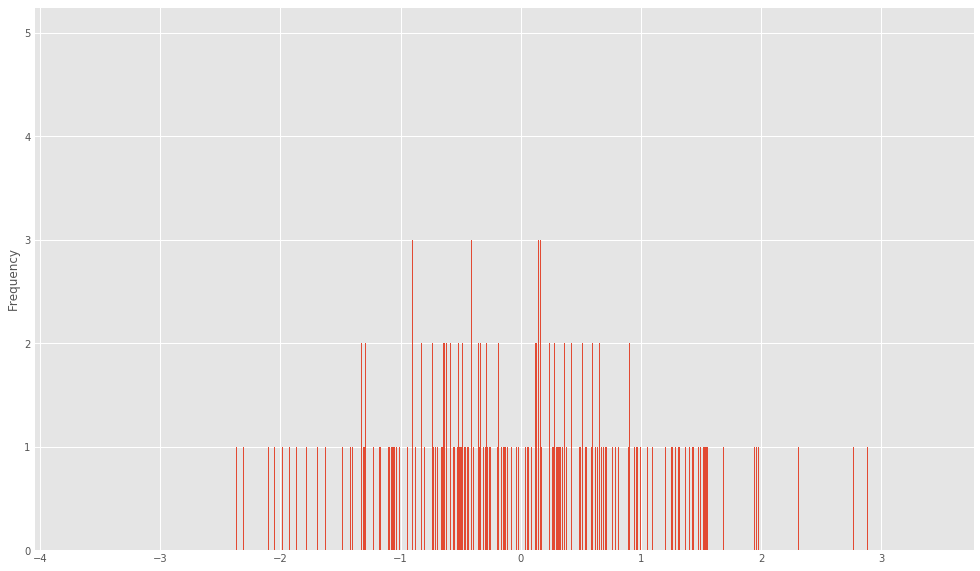

In [130]:
df1['A'].plot.hist(bins=5000,figsize=(15,10))

## Line Plots

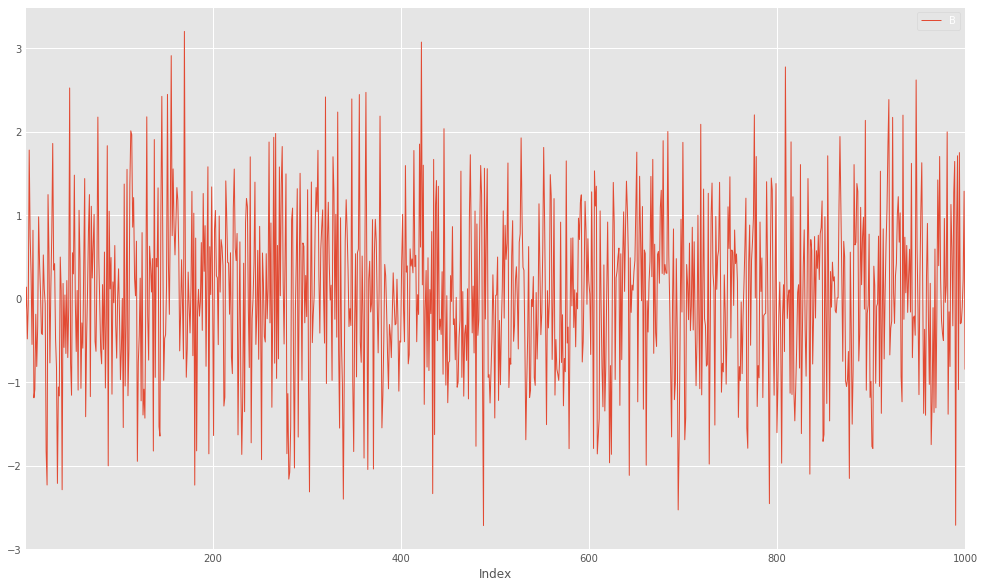

In [131]:
df1.plot.line(y='B',figsize=(15,10),lw=1, use_index=True)
# Here we just used the index that counts up by one as our x. If you wanted to use the x coordinate from a column, 
#just put that before the y='B'.
# For example: df1.plot.line(x='A', y='B',figsize=(12,3),lw=1)

## Scatter Plots

You can use c to color based off another column value
Use cmap to indicate colormap to use. 
For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

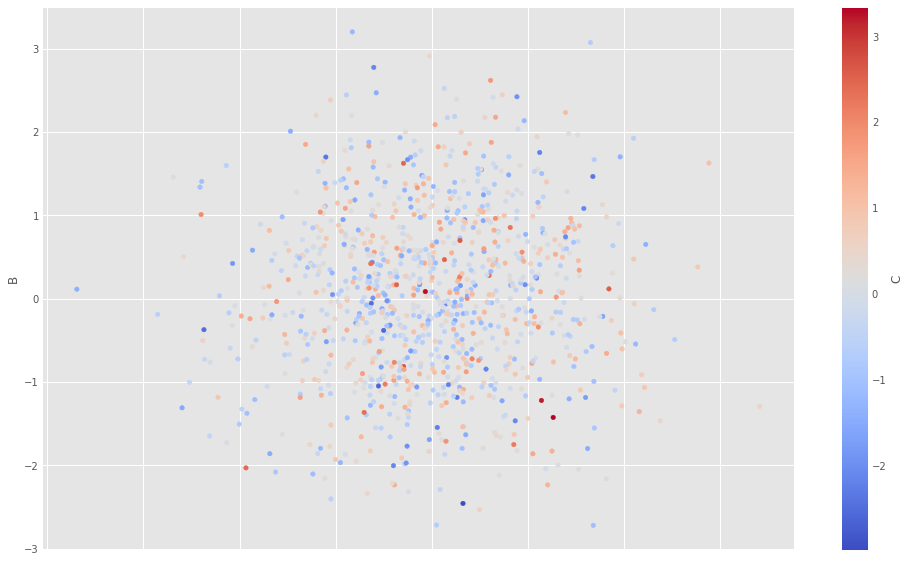

In [132]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm',figsize=(15,10))

Or use s to indicate size based off another column. s parameter needs to be an array, not just the name of a column:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


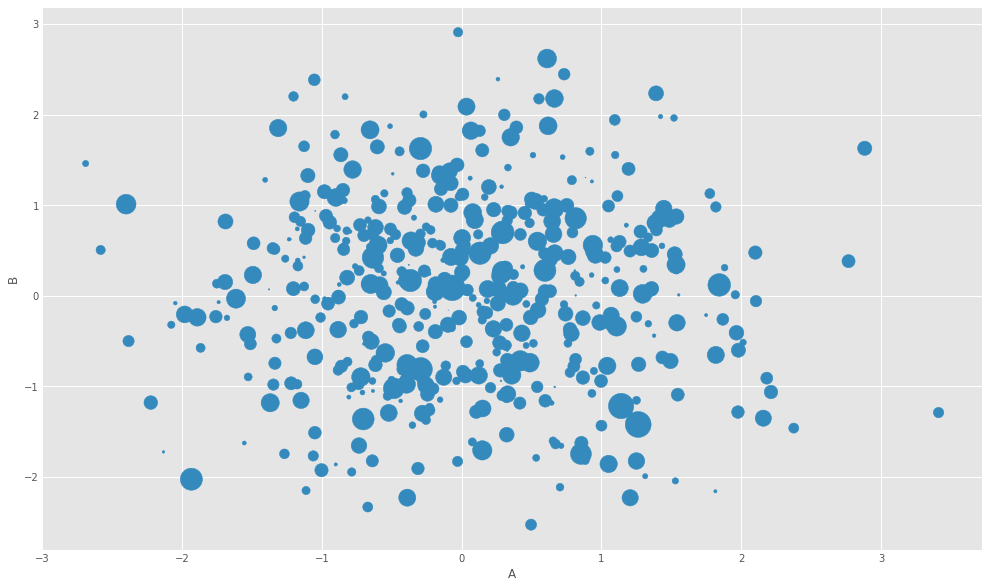

In [133]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200,figsize=(15,10))

## BoxPlots

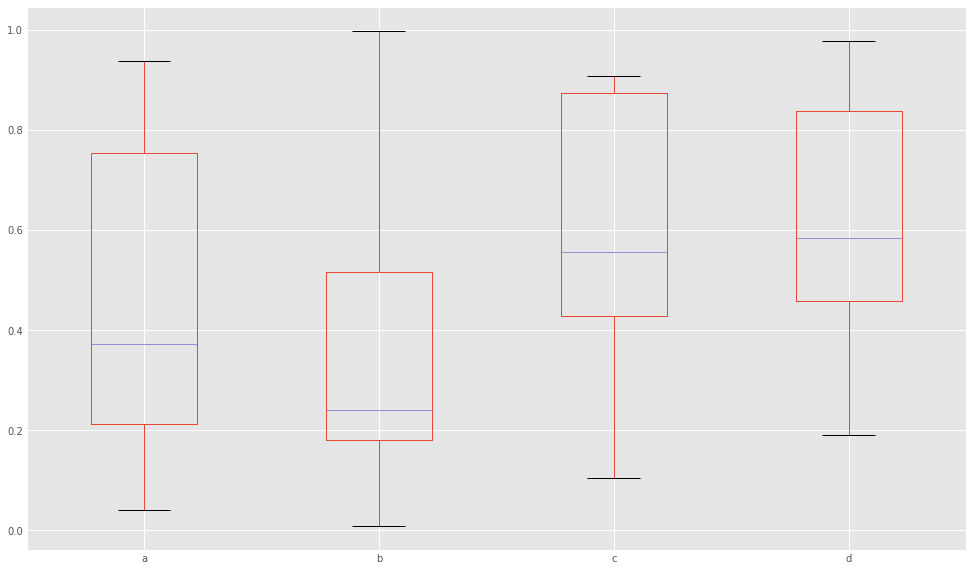

In [134]:
df2.plot.box(figsize=(15,10)) # Can also pass a by= argument for groupby

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

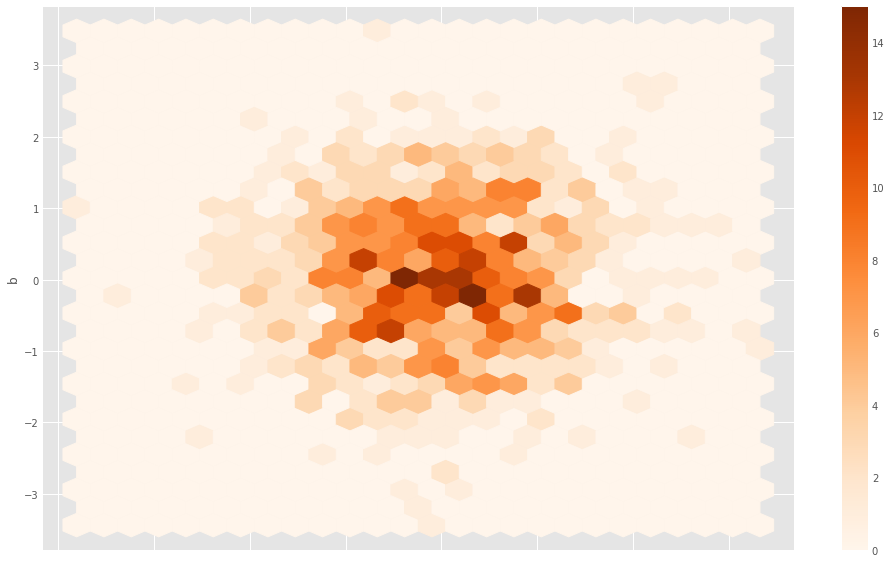

In [135]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges',figsize=(15,10))

____

## Kernel Density Estimation plot (KDE)

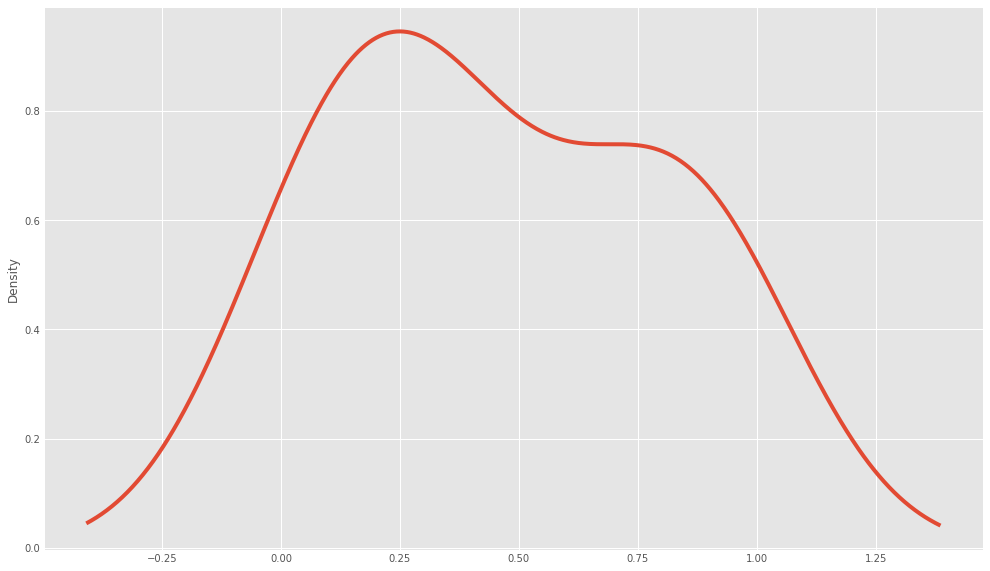

In [136]:
df2['a'].plot.kde(figsize=(15,10))

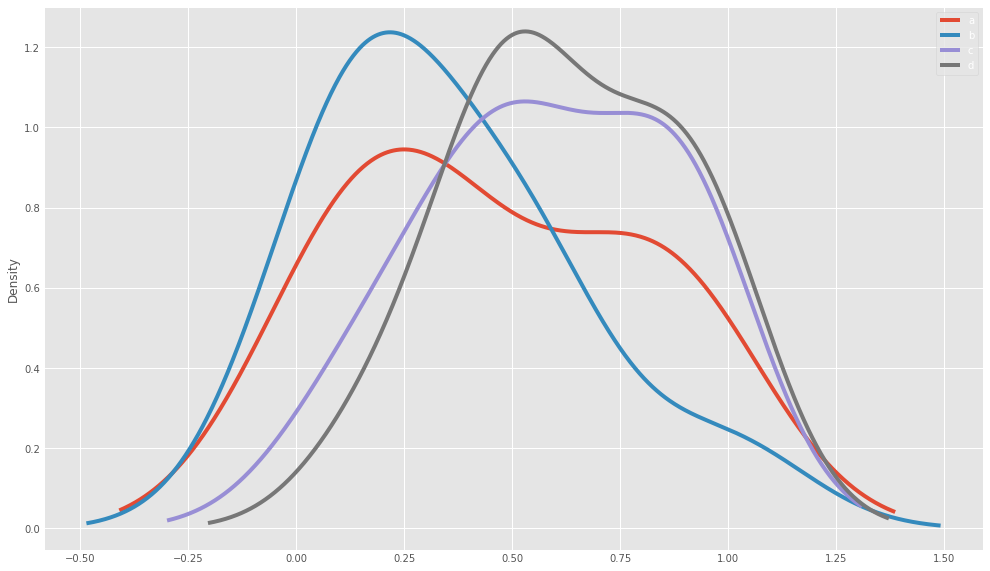

In [137]:
df2.plot.density(figsize=(15,10))

That's it! Hopefully you can see why this method of plotting will be a lot easier to use than full-on matplotlib, it balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib plt. call. 

In the next section, we will learn about seaborn, which is a statistical visualization library designed to work with pandas dataframes well.